## 2. Machine Learning for Regression


This notebook is an extension of the original [notebook](https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/02-regression/notebook.ipynb) containing notes and some extra analysis done by me.  

In [231]:
import pandas as pd
import numpy as np

In [232]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore') 

## 2.2 Data preparation

In [233]:
# Read the data
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We see that the column names are not consistent (case and naming convention). Therefore, we convert all columns to lowercase and separate multiple words in a column name with an underscore '_'.

In [234]:
# Normalize the columns
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

Let's do the same normalization for all other columns that have strings 

In [235]:
# Get all the columns having dtype = 'object' and store them in an array
string_columns = np.array(df.dtypes[df.dtypes=='object'].index)
string_columns

array(['make', 'model', 'engine_fuel_type', 'transmission_type',
       'driven_wheels', 'market_category', 'vehicle_size',
       'vehicle_style'], dtype=object)

In [236]:
# Perform the normalization
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(" ", "_")

In [237]:
# Verify if it worked
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [238]:
# Check what other dtypes are present
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

## 2.3 Exploratory data analysis

In [239]:
# Check the no. of rows and columns
df.shape

(11914, 16)

In [240]:
df.make.unique()

array(['bmw', 'audi', 'fiat', 'mercedes-benz', 'chrysler', 'nissan',
       'volvo', 'mazda', 'mitsubishi', 'ferrari', 'alfa_romeo', 'toyota',
       'mclaren', 'maybach', 'pontiac', 'porsche', 'saab', 'gmc',
       'hyundai', 'plymouth', 'honda', 'oldsmobile', 'suzuki', 'ford',
       'cadillac', 'kia', 'bentley', 'chevrolet', 'dodge', 'lamborghini',
       'lincoln', 'subaru', 'volkswagen', 'spyker', 'buick', 'acura',
       'rolls-royce', 'maserati', 'lexus', 'aston_martin', 'land_rover',
       'lotus', 'infiniti', 'scion', 'genesis', 'hummer', 'tesla',
       'bugatti'], dtype=object)

There are 11914 rows and 16 columns

In [241]:
# Look at the first 5 unique values per column and the total number of unique values
for col in df.columns:
    print(f'Column: {col}\n')
    print(f'First 5 unique values: {df[col].unique()[:5]}\n')
    print(f'Total unique values: {df[col].nunique()}\n\n')


Column: make

First 5 unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']

Total unique values: 48


Column: model

First 5 unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']

Total unique values: 914


Column: year

First 5 unique values: [2011 2012 2013 1992 1993]

Total unique values: 28


Column: engine_fuel_type

First 5 unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']

Total unique values: 10


Column: engine_hp

First 5 unique values: [335. 300. 230. 320. 172.]

Total unique values: 356


Column: engine_cylinders

First 5 unique values: [ 6.  4.  5.  8. 12.]

Total unique values: 9


Column: transmission_type

First 5 unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']

Total unique values: 5


Column: driven_wheels

First 5 unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']

Total unique 

In [242]:
# Get summary statistics of all the numeric columns
df.describe()

,year,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,msrp
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


Distribution of price

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

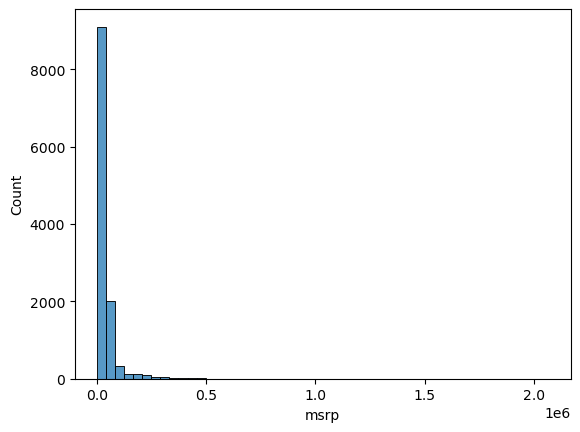

In [244]:
# Plot a histogram of the car prices
sns.histplot(df.msrp, bins=50)

We see that the distribution of prices is a 'Long Tail' distribution. This due to a small no. of extremely large prices in the data.

In [245]:
df['msrp'].describe()

count    1.191400e+04
mean     4.059474e+04
std      6.010910e+04
min      2.000000e+03
25%      2.100000e+04
50%      2.999500e+04
75%      4.223125e+04
max      2.065902e+06
Name: msrp, dtype: float64

From the summary statistics, the minimum car price is 2,000, maximum is 2.06 million and mean is around 40,600. <br><br>
Note: e+0x = 10<sup>x</sup> where x is an integer<br>
E.g. e+06 = 10<sup>6</sup> (1 million)   

In [246]:
print(f'{0.10:e}')

1.000000e-01


<AxesSubplot:xlabel='msrp', ylabel='Count'>

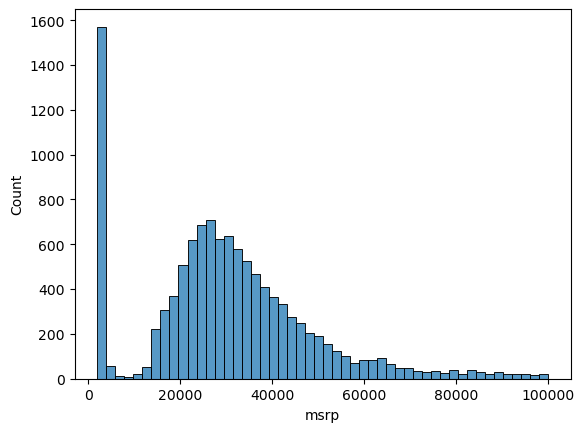

In [247]:
# Distribution of cars less than 100,000 (zooming into the left part of the graph)
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

We see a huge peak near 0 on the graph. We could explore this further by checking the most frequent msrp value (mode).

In [248]:
df['msrp'].mode()

0    2000
Name: msrp, dtype: int64

In [249]:
df['msrp'].value_counts().iloc[[0]]

2000    1036
Name: msrp, dtype: int64

The most frequent price is 2000 (appearing 1036 times) which is also the minimum price of a car in the data

### Further Analysis on Cheapest Cars

In [250]:
df_cheap = df[df['msrp'] == 2000]
df_cheap.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
17,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
18,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
19,audi,100,1992,regular_unleaded,172.0,6.0,automatic,all_wheel_drive,4.0,luxury,midsize,wagon,20,16,3105,2000
20,audi,100,1992,regular_unleaded,172.0,6.0,manual,front_wheel_drive,4.0,luxury,midsize,sedan,24,17,3105,2000
21,audi,100,1992,regular_unleaded,172.0,6.0,manual,all_wheel_drive,4.0,luxury,midsize,sedan,21,16,3105,2000


In [251]:
df_cheap['year'].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
Name: year, dtype: int64

In [252]:
df_cheap['market_category'].fillna('Not Specified', inplace=True)

In [253]:
df_cheap['market_category'].isna().sum()

0

In [254]:
df_cheap[df_cheap['market_category'].str.contains('luxury')].year.value_counts()

1991    31
1996    28
1992    27
1990    26
1993    25
1995    19
1997    19
1994    15
1998     5
Name: year, dtype: int64

### Back to the MSRP Column

We can dampen the effect of large msrp values on the distribution by applying a log transform to it. 

In [255]:
np.log1p([0, 1, 10, 100, 1000, 10000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  4.61512052,  6.90875478,
        9.21044037, 11.51293546])

Notice that as the value increases by 10, it's logarithm increases by about 2.3. Therefore, the log function can be used to downscale the data.

Note the `log1p` function is used to add 1 to the values. This is to handle the case if 0s appearing in the data (since log 0 is undefined).


In [256]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000+1]) == np.log1p([0, 1, 10, 1000, 100000])

array([ True,  True,  True,  True,  True])

In [257]:
# Applying the log transform to msrp
price_logs = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

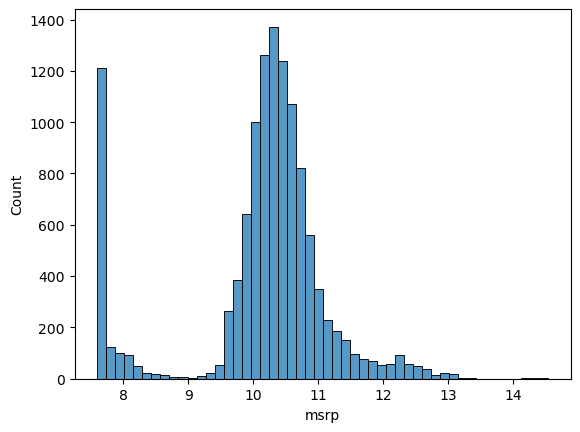

In [258]:
# Plot histogram over all prices
sns.histplot(price_logs, bins=50)

The log transform makes the distribution look approximately normally distributed

Missing values

In [259]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We'll handle the missing values before training our model

## 2.4 Setting up the validation framework

Splitting the dataset into train,validation and test sets.

Training set: 60% of the data

Validation set: 20% of the data

Test set: 20% of the data

In [260]:
# No. of rows
n = len(df)

# Using percentages for all sets
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = int(n * 0.2)

total_size = n_val + n_test + n_train

In [261]:
n, n_train, n_val, n_test, total_size

(11914, 7148, 2382, 2382, 11912)

We see that when using percentages for all sets, the total size of our new sets is less than the original dataset.

A better approach would be to use the size remaining after subtracting the sizes for validation and test sets as the training set size.

In [262]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

total_size = n_val + n_test + n_train


In [263]:
n, n_train, n_val, n_test, total_size

(11914, 7150, 2382, 2382, 11914)

We see that the training set gets 2 more records (rows) than before

In [264]:
# We can select random indices from the dataset like this
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


In [265]:
# Use slicing to select train, val and test sets
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

In [266]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


A problem with this approach is that the data isn't shuffled. This can cause some cars to be misrepresented among different sets.

E.g. BMW appears in training set but not validation set.

Therefore, it's a good idea to shuffle the data

In [267]:
# Indices to shuffle from 0 to n-1
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [268]:
np.random.seed(2)

# Randomly shuffling the indices
np.random.shuffle(idx)

idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [269]:
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [270]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [271]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [272]:
# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [273]:
# Applying the log transform to the msrp values in all sets and storing them in a separate variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [274]:
# Deleting the msrp column from our sets to prevent the model from learning the msrp values 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [275]:
# Checking if the y values match the no. of rows in each set
len(y_train) == n_train, len(y_val) == n_val, len(y_test) == n_test

(True, True, True)

## 2.5 Linear Regression

Linear regression is a model for solving regression problems, in which the expected output of the model is a real number. The objective of linear regression is to create a line that best fits the data which can then be used to make predictions on new values. The input of this model is a **feature matrix** `X` and the output is a **vector of predictions** `y` trying to be as close as possible to the **actual** `y` values. 

Formula for observation (car) $i$:

$g(x_i) = w_0 + \displaystyle\sum_{j=1}^{n} w_j \cdot x_{ij}$

Where:

- $w_0$: prediction if no features exist
- $n$: the number of features
- $w_{j}$: corresponding weight of feature $i$
- $x_{ij}$: the value of feature $j$ of observation $i$





In [276]:
# Checking the 10th row (car)
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [277]:
# Hypothetical features for 1 car (row/sample)
xi = [453, 11, 86]

# Defining arbitrary bias 
w0 = 7.17

# Defining arbitrary weights 
w = [0.01, 0.04, 0.002]

In [278]:
# Linear regression for 1 sample
def linear_regression(xi):
    
    # No. of features
    n = len(xi)

    # Prediction is the bias term by default
    pred = w0

    # If there are any features, scale them by their weights and add to prediction
    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

In [279]:
linear_regression(xi)

12.312

In [280]:
# Since the resulting price is in the log + 1 scale, we convert it back using the exp function (expm1 for subtracting 1) 
np.expm1(12.312)

222347.2221101062

In [281]:
np.log1p(222347.2221101062)

12.312

## 2.6 Linear regression vector form

Linear regression can be expressed as a dot product between weights and feature values in vector form (plus the bias after the dot product) 

Formula for observation $i$:

$g(x_i) = \displaystyle\sum_{j=0}^{n} w_j \cdot x_{ij}$

Where:

- $w_0$: prediction if no features exist
- $n$: the number of features
- $w_{j}$: corresponding weight of feature $i$
- $x_{ij}$: the value of feature $j$ of observation $i$
- $x_{i0}$ = 1 for all observations

In [282]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [283]:
def linear_regression(xi):
    return w0 + dot(xi, w)

We can concatenate the bias to the weight vector, and assume that a feature value of 1 will be multiplied with it (since $w_0 * 1 = w_0$)

In [284]:
w_new = [w0] + w

In [285]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [286]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

In [287]:
linear_regression(xi)

12.312

In [288]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

In [289]:
# Our feature vectors will have 1 as the first value (to multiply with the bias)
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

# Composing X as a matrix of features of different cars
X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [290]:
def linear_regression(X):
    return X.dot(w_new)

In [291]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [292]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [293]:
# Creating as many 1s as there are rows
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [294]:
# Adding the 1s to the first column of each row
X = np.column_stack([ones, X])

In [295]:
# Defining the target vector
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

Finding the model weights using the Normal Equation: (X<sup>T</sup>X)<sup>-1</sup>X<sup>T</sup>y

In [296]:
# XTX is the Gram matrix which is a square matrix. This square matrix can almost always be inverted.
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

In [297]:
w0 = w_full[0]      # Bias
w = w_full[1:]      # Rest of the weights corresponding to each feature

In [298]:
w0, w

(25844.75405576679, array([ -16.08906468, -199.47254894,   -1.22802883]))

Wrapping all that we did above in a function. We will extend this function in later sections.

In [299]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

## 2.8 Car price baseline model

Let's use the Linear Regression function created above on the dataset 

In [300]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [301]:
# Selecting the columns we think might be important in determining the price of a car
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

In [302]:
w0,w

(7.927257388070117,
 array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
        -9.06908672e-06]))

Plotting the predicted and actual prices (log transformed)

<AxesSubplot:ylabel='Count'>

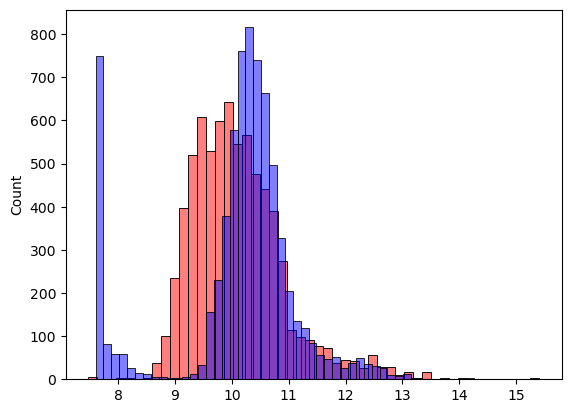

In [303]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

Root Mean Squared Error (RMSE) gives us a metric to objectively see the performance of our Linear Regression model.

$$RMSE = \sqrt{ \frac{1}{m} \sum {(g(x_i) - y_i)^2}}$$

- $g(x_i)$ is the model's prediction
- $y_i$ is the actual value
- $m$ is the number of observations in the dataset (no. of cars)

In [304]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [305]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Validating the model

In [306]:
# Creating a function to prepare the data for linear regression
def prepare_X(df):
    df_num = df[base]

    # Fill null values with 0 (makes linear regression ignore them)
    df_num = df_num.fillna(0)
    
    X = df_num.values
    return X

In [307]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)

# Test model (generate predictions) on the validation set
y_pred = w0 + X_val.dot(w)

# Check the RMSE between the actual values and predicted values
rmse(y_val, y_pred)

0.7616530991301601

## 2.11 Simple feature engineering

In [308]:
def prepare_X(df):
    df = df.copy()
    
    # Adding a new 'age' feature
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [309]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058335

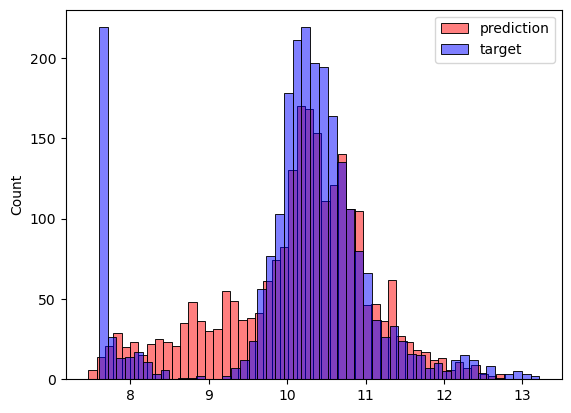

In [310]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

The model improved with the added 'age' feature and the distribution of predictions better matches the actual distribution of prices

## 2.12 Categorical variables

Let's deal with the categorical variables in the dataset. These variables have a fixed number of possible values (categories)

In [311]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

We convert the categorical variables into numeric variables by a technique called One-Hot Encoding. This creates a new feature (column) in the dataset for each category for each categorical variable. 

Observations that belong to a certain category will have it's feature value = 1 for that category and 0 for all other categories it doesn't belong to.   

In [312]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    # One-Hot encoding the categorical variables
    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

In [313]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

25.276184146246752

In [314]:
w0, w

(-1892716650172707.2,
 array([-1.25979400e-01, -4.11769415e+00, -1.49135423e+00, -1.20091264e+00,
        -1.87328446e-03, -1.15204727e+00, -1.38350480e+03, -1.39334362e+03,
        -1.39351243e+03,  9.15554192e-01,  2.06949015e+00, -3.70946478e+00,
        -3.60208641e+01, -7.60809203e-01,  6.99211474e+00,  4.21527311e+01,
         9.08207080e+00,  3.58850527e+00,  2.21686135e+02, -2.79986339e+01,
        -1.66096998e+01, -1.53650629e+01, -3.19971147e+01, -2.92630679e+01,
         1.89271665e+15,  1.89271665e+15,  1.89271665e+15,  1.89271665e+15,
        -8.15147229e-01, -3.70773744e+00, -9.46407895e+00, -9.25611606e+00,
        -2.25503056e+00, -3.24968724e+01, -2.14796148e+01, -9.71614353e+00,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

The RMSE and weight values drastically increased in magnitude after adding these categorical features. We can solve this problem by using a technique called Regularization. 

## 2.13 Regularization

The reason we got a large RMSE and increased magnitude in the weights was because after One-Hot Encoding, many columns start looking similar to each other as shown below.

In [315]:
# Imagine X is a feature matrix that has undergone One-Hot encoding
X = [
    [4, 4, 1, 0, 0, 0],
    [3, 5, 0, 0, 0, 0],
    [5, 1, 0, 1, 0, 0],
    [5, 4, 1, 0, 0, 0],
    [7, 5, 0, 0, 0, 1],
    [4, 5, 0, 1, 1, 0],
]

X = np.array(X)

y= [1, 2, 3, 1, 2, 3]


In [316]:
XTX = X.T.dot(X)
XTX

array([[140, 111,   9,   9,   4,   7],
       [111, 108,   8,   6,   5,   5],
       [  9,   8,   2,   0,   0,   0],
       [  9,   6,   0,   2,   1,   0],
       [  4,   5,   0,   1,   1,   0],
       [  7,   5,   0,   0,   0,   1]])

We see that column 3 and 4 are look similar to each other in the above Gram Matrix. When the inverse of this matrix is taken, it results in large values as shown below.

In [317]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[  2.  ,  -1.2 ,  -4.2 ,  -8.8 ,   6.8 ,  -8.  ],
       [ -1.2 ,   0.76,   2.36,   5.24,  -4.24,   4.6 ],
       [ -4.2 ,   2.36,   9.96,  18.64, -13.64,  17.6 ],
       [ -8.8 ,   5.24,  18.64,  39.76, -30.76,  35.4 ],
       [  6.8 ,  -4.24, -13.64, -30.76,  25.76, -26.4 ],
       [ -8.  ,   4.6 ,  17.6 ,  35.4 , -26.4 ,  34.  ]])

Completing the normal equation gives us large negative weight values for some weights (notice the powers of 10)

In [318]:
XTX_inv.dot(X.T).dot(y)

array([ 1.19904087e-14,  4.00000000e-01, -6.00000000e-01,  2.60000000e+00,
       -1.60000000e+00, -3.19744231e-14])

This problem can be solved by adding a small value to the diagonal of the Gram Matrix. This makes the columns dissimilar from each other.

This small value denoted as $r$, is called the Regularization Coefficient 

In [319]:
# Adding a small value of 0.01 to the diagonal of XTX (Gram Matrix)
XTX = XTX + 0.01 * np.eye(6)
XTX

array([[140.01, 111.  ,   9.  ,   9.  ,   4.  ,   7.  ],
       [111.  , 108.01,   8.  ,   6.  ,   5.  ,   5.  ],
       [  9.  ,   8.  ,   2.01,   0.  ,   0.  ,   0.  ],
       [  9.  ,   6.  ,   0.  ,   2.01,   1.  ,   0.  ],
       [  4.  ,   5.  ,   0.  ,   1.  ,   1.01,   0.  ],
       [  7.  ,   5.  ,   0.  ,   0.  ,   0.  ,   1.01]])

The inverse contains relatively smaller values than before  

In [320]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[  0.98360508,  -0.59736018,  -2.02664888,  -4.24555679,
          3.26528454,  -3.85983627],
       [ -0.59736018,   0.40187354,   1.07525038,   2.53817819,
         -2.13673782,   2.15064707],
       [ -2.02664888,   1.07525038,   5.29245615,   8.90775399,
         -6.11624791,   8.72305965],
       [ -4.24555679,   2.53817819,   8.90775399,  19.3470684 ,
        -14.90666557,  16.85941241],
       [  3.26528454,  -2.13673782,  -6.11624791, -14.90666557,
         13.39526387, -12.05277492],
       [ -3.85983627,   2.15064707,   8.72305965,  16.85941241,
        -12.05277492,  17.09467184]])

The Normal Equation gives smaller weight values

In [321]:
XTX_inv.dot(X.T).dot(y)

array([ 0.15285858,  0.30466357, -0.90200783,  1.90176338, -1.02625301,
       -0.58745335])

The inverse of a square matrix with duplicate columns (or columns that can be expressed as a linear combination of other columns) doesn't exist and that matrix is called a Singular Matrix. 

But in the case where columns differ from each other by a small amount, the inverse can be computed numerically and can result in large values as shown below:

In [322]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

In [323]:
y= [1, 2, 3, 1, 2, 3]

Here column 2 and 3 differ by a very small amount


In [324]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

In [325]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv


array([[ 3.86409478e-02, -1.26839821e+05,  1.26839770e+05],
       [-1.26839767e+05,  2.88638033e+14, -2.88638033e+14],
       [ 1.26839727e+05, -2.88638033e+14,  2.88638033e+14]])

In [326]:
XTX_inv.dot(X.T).dot(y)

array([-1.93908875e-01, -3.61854375e+06,  3.61854643e+06])

The inverse and normal equation result in very large values. Regularization can help separate the columns and reduce the magnitude of the final weights.

In [327]:
XTX = XTX + 0.01 * np.eye(3)

In [328]:
pred= np.linalg.inv(XTX).dot(X.T).dot(y)
pred

array([0.33643484, 0.04007035, 0.04007161])

Using the Regularization Coefficient in our training function:

In [329]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [330]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.46082082859947154

The RMSE of our linear regression model has reduced and improved 

## 2.14 Tuning the model

Trying different $r$ values on the validation set:

In [331]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 -1892716650172707.2 25.276184146246752
1e-05 3.675768986528646 0.4608153229471849
0.0001 7.139881351483436 0.46081536402871404
0.001 7.130829069309948 0.46081585835984
0.1 7.000232395068538 0.46087365491185095
1 6.250747847621743 0.46158128382736413
10 4.729512585696509 0.47260987726682924


The best $r$ value is 0.001

In [332]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585835984

## 2.15 Using the model

Combining the train and validation sets

In [333]:
df_full_train = pd.concat([df_train, df_val])

In [334]:
df_full_train = df_full_train.reset_index(drop=True)

In [335]:
X_full_train = prepare_X(df_full_train)

In [336]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [337]:
y_full_train = np.concatenate([y_train, y_val])

Training our linear regression model with the best $r$ value found above and making predictions on the test set

In [338]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [339]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.46007539689045956

The RMSE on the test set is 0.46

In a real world application, a web service would send data to our model in JSON format

In [340]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

We first need to convert it to a Pandas DataFrame

In [341]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


We then clean the data and use our model to predict the price

In [342]:
X_small = prepare_X(df_small)

In [344]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.63249250863327

We then remove the log transform to get the predicted price in dollars

In [345]:
np.expm1(y_pred)

41459.33676616719

## 2.16 Next steps

We included only 5 top categories of the categorical features. What happens if we include 10?

In [131]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head(10).index)

In [132]:
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Applying the log transform to the msrp values in all sets and storing them in a separate variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


# Deleting the msrp column from our sets to prevent the model from learning the msrp values 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [133]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 7511.569851625722 451.0371197680913
1e-05 7.062701074398234 0.4427544459271014
0.0001 7.062060607860375 0.4427539348727443
0.001 7.056330755440397 0.4427489848555143
0.1 6.69594073717173 0.4426732377442754
1 5.9309660175234225 0.44360259631276616
10 4.65404952084525 0.4575693869640836


The best r is 0.1. with a validation set RMSE of 0.44. This is slightly better than using only the top 5 categories as it gave a validation accuracy of 0.46. 

Let's now check the RMSE on the test set.

In [134]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.440938133078082

The RMSE on the test set is 0.44 for top 10 categories and is 0.46 for top 5 categories. Therefore, adding more categories slightly improved the model.
  
Let's try using all categories

In [145]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().index)

In [146]:
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Applying the log transform to the msrp values in all sets and storing them in a separate variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)


# Deleting the msrp column from our sets to prevent the model from learning the msrp values 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [147]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3.5402543667029574e+17 6.991819118950398e+16
1e-05 6.727346309780682 0.19979877225627213
0.0001 6.06602897253473 0.2008451883564082
0.001 6.052892685053827 0.20054669906760234
0.1 5.88015392357895 0.2005913141722379
1 5.196606920547412 0.21941215789527144
10 4.1777015916511075 0.31734352892901985


The best r is 0.00001. with a validation set RMSE of 0.2. This is twice as better than before

Let's now check the RMSE on the test set.

In [156]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.00001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.24203868343975224

Using all the categories of categorical features has reduced the RMSE.

Let's plot the predictions and actual values of the price

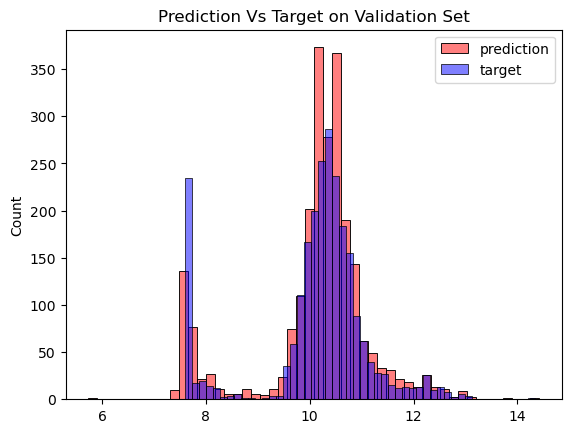

In [149]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_test, label='target', color='blue',  alpha=0.5, bins=50)
plt.title('Prediction Vs Target on Validation Set')
plt.legend()

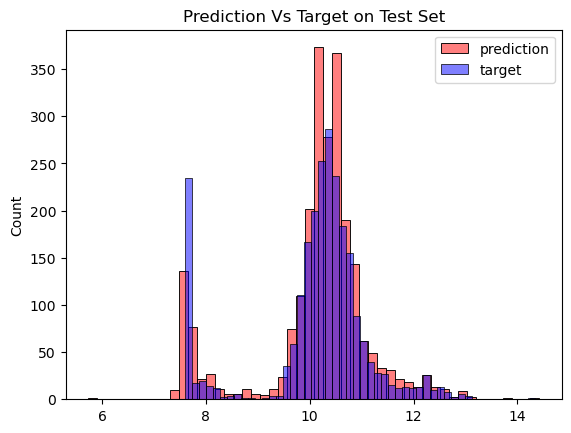

In [150]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_test, label='target', color='blue',  alpha=0.5, bins=50)
plt.title('Prediction Vs Target on Test Set')
plt.legend()

The histogram of the predictions matches the actual values on the test and validation sets better than previously (though there are cases where it over estimates)

## 2.17 Checking Effect of Log Transform on RMSE

In [157]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().index)

In [158]:
# Creating the different sets based on the shuffled indices
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

# Resetting the index and removing the index column that is added after calling reset_index 
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Applying the log transform to the msrp values in all sets and storing them in a separate variable
y_train = df_train.msrp.values
y_val = df_val.msrp.values
y_test = df_test.msrp.values


# Deleting the msrp column from our sets to prevent the model from learning the msrp values 
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [159]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 9.694742036821356e+20 3.076785144760726e+20
1e-05 38027.09878901241 8312.242740735534
0.0001 35923.71418753722 8308.793949444227
0.001 35941.16243731584 8308.1431235872
0.1 32383.440833768007 8362.049799036877
1 7266.644075372497 10212.200960255706
10 -21493.355850939293 15761.527823837872


The best r is 0.001 with a validation set RMSE of 8308.14. We can see that by not using the log transform, RMSE increases by a lot (especially without regularization). 

Let's now check the RMSE on the test set.

In [161]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

8530.953773618368

The above experiment has shown that using the log transform can drastically improve the quality of Linear Regression. 

## 2.18 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability